## Bootstrapping to Create Confidence Interval

In [9]:
import numpy as np
import pandas as pd

In [10]:
# create a dataset
seed = np.random.RandomState(seed = 150)
tools = seed.normal(loc = 10.0, scale = 1.0, size = 100)
print(tools)

[ 9.76861675 10.39061323 10.35829747 10.56624448 10.16623399 11.91341213
 10.30290274  9.16917369  9.93985767  9.90570586  8.63225522  9.40748191
  9.62753427 11.72776709 12.69285938  8.62413059 11.9573157   8.53363923
  9.86505766  8.05027655 10.52237428  8.73886755  9.9266402   7.85906353
  9.26679813  8.28521506 11.37022965  9.99941665  7.32575253 10.79430038
 10.88403951 10.86876188  9.81642672  9.87357483  9.72659472  8.91343079
 10.23352757  9.92980664 11.28957684 11.18078268 10.76332227 11.33704309
  9.69487317 10.67045627  9.70177758  9.57836763  8.52994698  9.8115708
  9.77534116  9.65696666 10.40926618  9.33371275  9.33593699  9.74704464
 11.23729552 10.00178756 11.45999923  9.79504687  9.44451007  9.41998154
 10.25122522 10.78767487  9.47857277  7.9198773   8.88371343 10.34845105
  9.24997104 10.4980219   8.10243093  9.28733246 10.85413188  7.90903479
  9.42611873  9.05849412 10.13353728  9.80269677  8.9928866  11.66425202
 10.73169967  8.62049029  9.88270952 11.15063253  9.

In [11]:
# draw bootstrap samples (with replacement and the same size as the tools size) and append mean to mean_lengths
mean_lengths, sims = [], 1000
seed = np.random.RandomState(seed = 1)

for i in range(sims):
    temp_sample = seed.choice(tools, replace = True, size = len(tools))
    sample_mean = temp_sample.mean()
    mean_lengths.append(sample_mean)
    
# calculate bootstrapped mean and 95% confidence interval
boot_mean = np.mean(mean_lengths)
boot_95_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_95_ci))

Bootstrapped Mean Length = 9.838352171876119, 95% CI = [ 9.63299536 10.03830558]


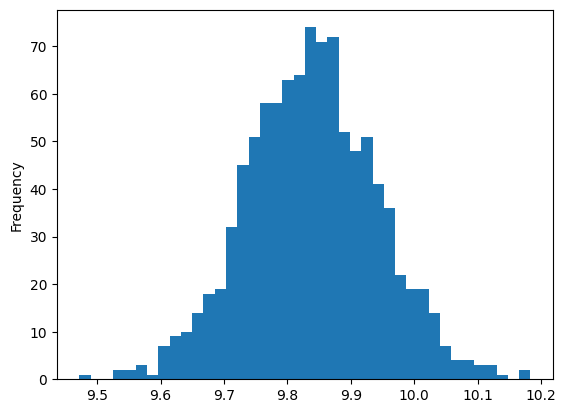

In [12]:
pd.Series(mean_lengths).plot.hist(bins = 40);

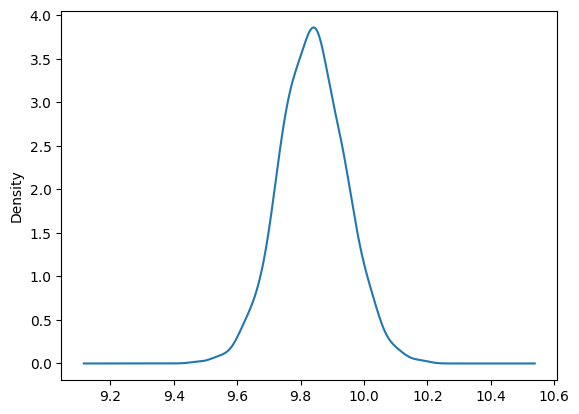

In [13]:
pd.Series(mean_lengths).plot.density();

In [14]:
df = pd.read_csv("C:\\Users\\wodnj\\OneDrive\\바탕 화면\\Advanced Machine Learning\\DSC 540 - Week 3\\Data File\\bdims.csv")
df.head()

,bia_di,bii_di,bit_di,che_de,che_di,elb_di,wri_di,kne_di,ank_di,sho_gi,...,bic_gi,for_gi,kne_gi,cal_gi,ank_gi,wri_gi,age,wgt,hgt,sex
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1


In [15]:
df = df[['wgt', 'hgt']]

In [16]:
df.hgt.median()

170.3

In [17]:
df.hgt.mean()

171.14378698224854

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wgt     507 non-null    float64
 1   hgt     507 non-null    float64
dtypes: float64(2)
memory usage: 8.0 KB


In [19]:
df.corr().loc['wgt', 'hgt']

0.7173010787241639

In [20]:
# sample with replacement and calculate quantities of interest
sims, data_size, height_medians, height_means, hw_corr = 10000, df.shape[0], [], [], []

for i in range(sims):
    tmp_df = df.sample(n = data_size, replace = True, random_state = i)
    height_means.append(tmp_df['hgt'].mean())
    height_medians.append(tmp_df['hgt'].median())
    hw_corr.append(tmp_df['wgt'].corr(tmp_df['hgt']))

# calculate confidence intervals
height_median_ci = np.percentile(height_medians, [2.5, 97.5])
height_mean_ci = np.percentile(height_means, [2.5, 97.5])
height_weight_corr_ci = np.percentile(hw_corr, [2.5, 97.5])

# Print results
print("Height Median CI = {} \nHeight Mean CI = {}".format( height_median_ci, height_mean_ci))
print("Height Weight Correlation CI = {}".format( height_weight_corr_ci))

Height Median CI = [170.  172.7] 
Height Mean CI = [170.34418146 171.96272682]
Height Weight Correlation CI = [0.67059681 0.75988881]


In [21]:
pd.Series(height_medians).median()

170.3

In [22]:
pd.Series(height_medians).mean()

170.70735

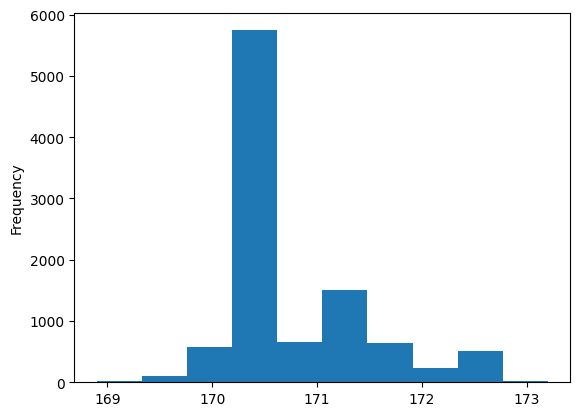

In [23]:
pd.Series(height_medians).plot.hist(bins = 10);

<Axes: ylabel='Density'>

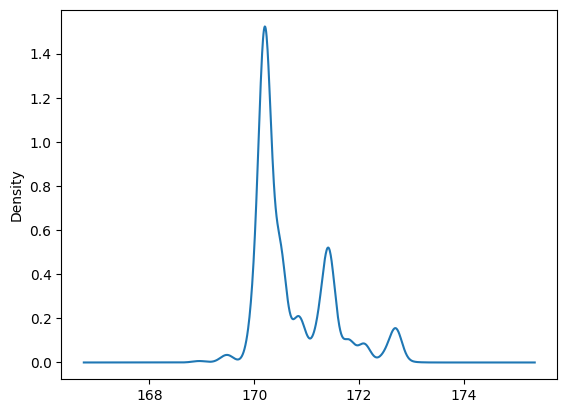

In [24]:
pd.Series(height_medians).plot.density()

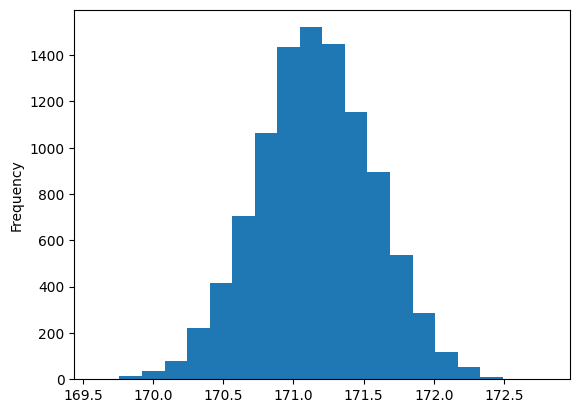

In [25]:
pd.Series(height_means).plot.hist(bins = 20);